In [15]:
import os
import numpy as np

import tensorflow as tf
'''from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.applications.inception_v3 import InceptionV3'''
from keras.applications import vgg16
from keras.applications import xception
from keras.applications import densenet
from keras.applications import vgg19

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer,Dense, Dropout, Input, Activation, TimeDistributed, Reshape
from tensorflow.keras.layers import  GRU, Bidirectional
from tensorflow.keras.layers import  Conv1D, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LSTM, ZeroPadding2D, GlobalAveragePooling2D, SpatialDropout2D, GlobalMaxPool1D,Convolution1D
from tensorflow.keras.callbacks import History 
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
import time
import math
import random
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#filtering and smoothing
def smooth_curve(points, factor=0.0):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

#accuracy and loss function
def plot_results(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  %matplotlib inline
  plt.plot(epochs, smooth_curve(acc), 'bo', label='Training acc')
  plt.plot(epochs, smooth_curve(val_acc), 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, smooth_curve(loss), 'bo', label='Training loss')
  plt.plot(epochs, smooth_curve(val_loss), 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()



In [2]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

# base_dir = '/content/drive/MyDrive/deepclass/resize/imageall/'
Images_data = pickle.load(open('../Images_data', "rb" )) ## two back folder
## connectivity pictures for 14 healthy patient and 14 ill patients, each one of them has 144 pictures. 14*144 = 2016
#X_sz: images related to healthy people
X_sz = Images_data[:2016]
#X_h: images related to patients
X_h = Images_data[2016:]
#label healthy:1
sz = 2016*[1]
#label patient:0
h = 2016*[0]
labels = sz+h



In [6]:
# a  [100,64,64] np.save('./a.npy',a)
# b = np.load('./a.npy')
#showing a certain image
print(X_h[0].shape)
#showing a certain pixel
print(X_h[0][50,50,:]) #[R G B]  min = 0 , max = 255

(224, 224, 3)
[ 75 194 163]


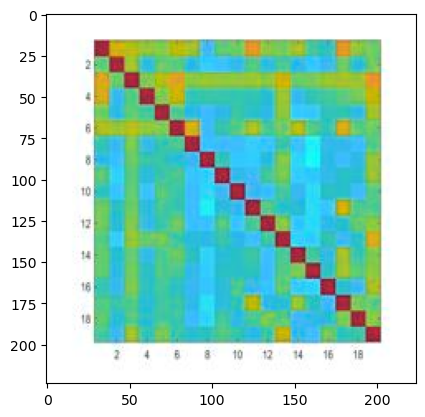

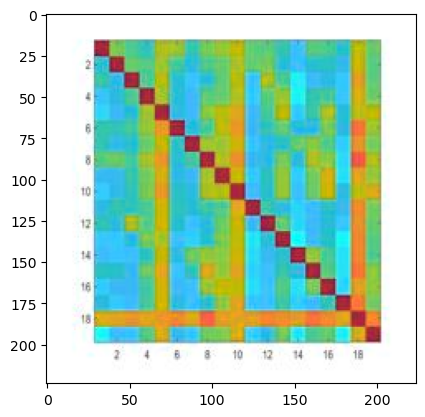

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_sz[0])
plt.figure()
plt.imshow(X_h[0])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3211392   
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

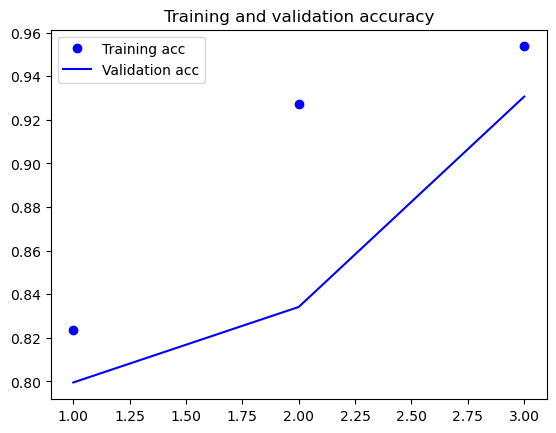

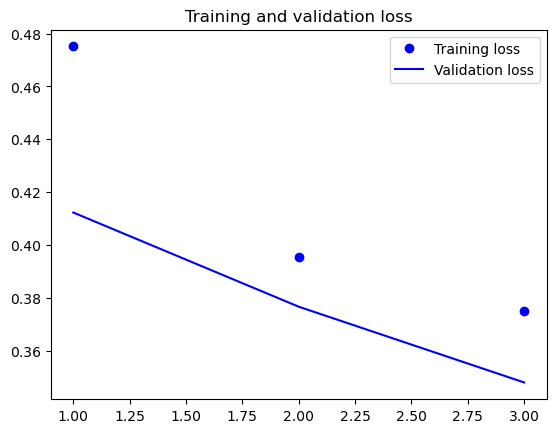

In [10]:
import numpy as np
def create_model():
  conv_base = tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
  # conv_base = tf.keras.applications.EfficientNetB0(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
  # conv_base = tf.keras.applications.VGG19(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
  # conv_base = tf.keras.applications.DenseNet121(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
 #accuracy improved 6% when we set cnv_base.trainable to be true
  conv_base.trainable = True
  #if we want to train a certain layer in conv_base we use the conv_base.summary and find the name of that layer "for example:'block5_conv3' " and then use the follong piece of code
  '''set_trainable = True
  for layer in conv_base.layers:
      if layer.name == 'block5_conv3':
          set_trainable = True
      else:
          layer.trainable = False
  print("Model edited")'''

  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  #model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128)) 
  model.add(BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(0.3))
  #model.add(layers.Dense(1, activation='sigmoid'))
  model.add(layers.Dense(1))
  model.add(BatchNormalization())
  model.add(layers.Activation('sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=3e-5),metrics=['acc'])
  model.summary()
  return model



hist_VGG16 = {}
seed = 7
np.random.seed(seed)
X_train, X_test, Y_train, Y_test = train_test_split(Images_data,labels,test_size=0.1, random_state=6)

x_train, x_val = np.array(X_train), np.array(X_test)
y_train, y_val = np.array(Y_train), np.array(Y_test)

model = create_model()
history = model.fit(x_train,y_train,epochs=3, batch_size=32, validation_data = (x_val,y_val), shuffle=True)
plot_results(history) # How to use history of model.fit and what is in it



In [12]:
conv_base = tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
2016*[1]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
